In [ ]:
%%capture
!pip install ultralytics
!pip install roboflow

In [ ]:
import time
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from IPython.display import display, Image
from google.colab.patches import cv2_imshow

from ultralytics import YOLO
from roboflow import Roboflow

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
yolo_v5_model = YOLO('/content/best_v5.pt')
yolo_v8_model = YOLO('/content/best_v8.pt')
yolo_v10_model = YOLO('/content/best_v10.pt')
yolo_v11_model = YOLO('/content/best_v11.pt')

In [ ]:
rf = Roboflow(api_key="wMboQZJ2U4YS1pEfZwnZ")
project = rf.workspace("parking-lot-model-project-1").project("car-parking-t9gko")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Car-parking-3 in yolov8:: 100%|██████████| 850/850 [00:00<00:00, 3159.99it/s]


In [ ]:
metrics_v5 = yolo_v5_model.val(data='/content/Car-parking-3/data.yaml')

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv5n summary (fused): 193 layers, 2,503,139 parameters, 0 gradients, 7.1 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 84.5MB/s]
val: Scanning /content/Car-parking-3/test/labels... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 301.50it/s]

val: New cache created: /content/Car-parking-3/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.93s/it]


                   all         20        999          1          1      0.995      0.975
Speed: 13.3ms preprocess, 447.2ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/val


In [ ]:
metrics_v8 = yolo_v8_model.val(data='/content/Car-parking-3/data.yaml')

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Car-parking-3/test/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.95s/it]


                   all         20        999          1          1      0.995      0.978
Speed: 13.0ms preprocess, 465.2ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val2


In [ ]:
metrics_v10 = yolo_v10_model.val(data='/content/Car-parking-3/data.yaml')

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv10n summary (fused): 285 layers, 2,694,806 parameters, 0 gradients, 8.2 GFLOPs


val: Scanning /content/Car-parking-3/test/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.04s/it]


                   all         20        999      0.993      0.989      0.995      0.987
Speed: 6.1ms preprocess, 480.7ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/val3


In [ ]:
metrics_v11 = yolo_v11_model.val(data='/content/Car-parking-3/data.yaml')

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/Car-parking-3/test/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.98s/it]


                   all         20        999          1          1      0.995      0.977
Speed: 8.0ms preprocess, 468.6ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/val4


In [ ]:
metrics_v5.results_dict['metrics/precision(B)']

In [ ]:
metrics_v5.results_dict

{'metrics/precision(B)': 0.9999069365413463,
 'metrics/recall(B)': 1.0,
 'metrics/mAP50(B)': 0.995,
 'metrics/mAP50-95(B)': 0.9746315920651508,
 'fitness': 0.9766684328586358}

In [ ]:
metrics_v8.results_dict

{'metrics/precision(B)': 0.9999610111061836,
 'metrics/recall(B)': 1.0,
 'metrics/mAP50(B)': 0.995,
 'metrics/mAP50-95(B)': 0.9776179199909013,
 'fitness': 0.9793561279918113}

In [ ]:
metrics_v10.results_dict

{'metrics/precision(B)': 0.9929656219575318,
 'metrics/recall(B)': 0.9891020552485495,
 'metrics/mAP50(B)': 0.9948594865178587,
 'metrics/mAP50-95(B)': 0.9867297001070691,
 'fitness': 0.987542678748148}

In [ ]:
metrics_v11.results_dict

{'metrics/precision(B)': 0.9999426933692239,
 'metrics/recall(B)': 1.0,
 'metrics/mAP50(B)': 0.995,
 'metrics/mAP50-95(B)': 0.976768211950304,
 'fitness': 0.9785913907552737}

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['v5', 'v8', 'v10', 'v11']
precision = [0.9999069365413463, 0.9999610111061836, 0.9929656219575318, 0.9999426933692239]
recall = [1.0, 1.0, 0.9891020552485495, 1.0]
mAP50 = [0.995, 0.995, 0.9948594865178587, 0.995]
mAP50_95 = [0.9746315920651508, 0.9776179199909013, 0.9867297001070691, 0.976768211950304]
fitness = [0.9766684328586358, 0.9793561279918113, 0.987542678748148, 0.9785913907552737]

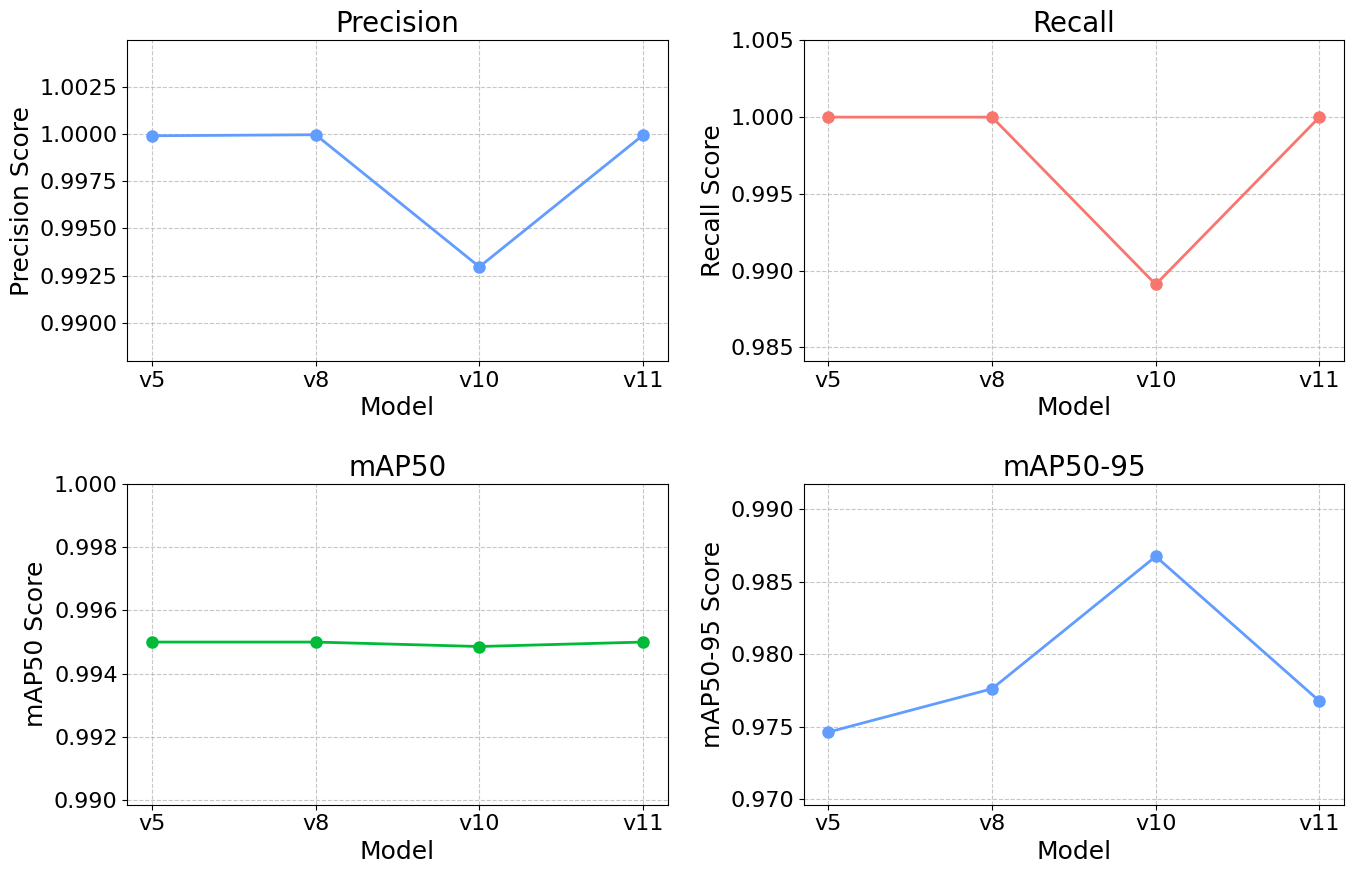

In [ ]:
import matplotlib.pyplot as plt

# Set global font sizes
plt.rcParams.update({
    'font.size': 22,        # Default font size
    'axes.titlesize': 24,   # Font size for subplot titles
    'axes.labelsize': 22,   # Font size for x and y labels
    'legend.fontsize': 20,  # Font size for the legend
    'xtick.labelsize': 20,  # Font size for x-axis tick labels
    'ytick.labelsize': 20   # Font size for y-axis tick labels
})

metrics_data = [precision, recall, mAP50, mAP50_95]
metric_names = ['Precision', 'Recall', 'mAP50', 'mAP50-95']
colors = ['#619CFF', '#F8766D', '#00BA38', '#619CFF']

# Set up the plot grid
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot each metric as a line plot
for i, ax in enumerate(axs.flat):
    ax.plot(models, metrics_data[i], marker='o', color=colors[i], linewidth=2, markersize=8)
    ax.set_title(metric_names[i], fontsize=20)
    ax.set_ylim([min(metrics_data[i]) - 0.005, max(metrics_data[i]) + 0.005])
    ax.set_xlabel('Model', fontsize=18)
    ax.set_ylabel(f'{metric_names[i]} Score', fontsize=18)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
